In [1]:

# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [2]:
# read the csv
us_df = pd.read_csv("db/us_energy.csv")
us_df.head()

,Unnamed: 0,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),GDP(Million dollar),Population(Thousand),Energy Price(dollars in million btu)
0,0,1970,4070021.0,67720114.0,0.0,205052.0,1.65
1,1,1971,4262212.0,69163993.0,0.0,207661.0,1.76
2,2,1972,4382009.0,72677208.0,0.0,209896.0,1.84
3,3,1973,4410938.0,75723857.0,0.0,211909.0,2.02
4,4,1974,4741851.0,73914525.0,0.0,213854.0,2.87


In [3]:
df = us_df[["Year", "Produced Renewable(Billion Btu)", "Total Consumed(Billion Btu)"]]
df.head()

,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu)
0,1970,4070021.0,67720114.0
1,1971,4262212.0,69163993.0
2,1972,4382009.0,72677208.0
3,1973,4410938.0,75723857.0
4,1974,4741851.0,73914525.0


In [4]:
df["Status"] = np.where(df["Produced Renewable(Billion Btu)"] > df["Total Consumed(Billion Btu)"], 1, 0)
df.head()

/Users/nadiregokcehan/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),Status
0,1970,4070021.0,67720114.0,0
1,1971,4262212.0,69163993.0,0
2,1972,4382009.0,72677208.0,0
3,1973,4410938.0,75723857.0,0
4,1974,4741851.0,73914525.0,0


In [5]:
df["Difference"] = (df["Produced Renewable(Billion Btu)"] - df["Total Consumed(Billion Btu)"])
df.head()

/Users/nadiregokcehan/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),Status,Difference
0,1970,4070021.0,67720114.0,0,-63650093.0
1,1971,4262212.0,69163993.0,0,-64901781.0
2,1972,4382009.0,72677208.0,0,-68295199.0
3,1973,4410938.0,75723857.0,0,-71312919.0
4,1974,4741851.0,73914525.0,0,-69172674.0


In [6]:
df.tail()

,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),Status,Difference
43,2013,9242048.0,97099401.0,0,-87857353.0
44,2014,9600941.0,98267257.0,0,-88666316.0
45,2015,9565096.0,97364113.0,0,-87799017.0
46,2016,10225357.0,97230097.0,0,-87004740.0
47,2017,11094237.0,97621515.0,0,-86527278.0


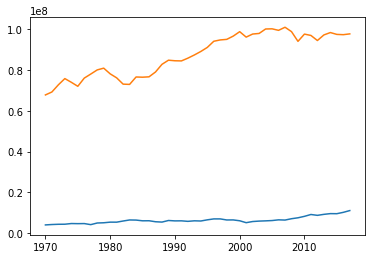

In [7]:
plt.plot(df["Year"], df["Produced Renewable(Billion Btu)"])
plt.plot(df["Year"], df["Total Consumed(Billion Btu)"])

In [8]:
X = df[["Produced Renewable(Billion Btu)", "Total Consumed(Billion Btu)"]]
y = df["Year"].values.reshape(-1,1)


In [9]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(36, 2)
(36, 1)
(12, 2)


In [10]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 12.3097695480617, R2: 0.9311555532499268


In [149]:

n=model.predict([[100000000, 100000000]])
n

array([[2389.48276079]])

(36, 1)
(36, 1)
(12, 1)


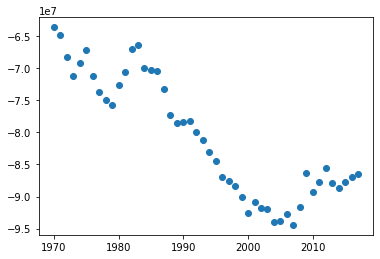

In [155]:
# create a model for difference

X = df["Year"].values.reshape(-1,1)
y = df["Difference"].values.reshape(-1,1)


# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

plt.scatter(X,y)

In [156]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 15948828540515.033, R2: 0.778026060917972


In [177]:
p = model.predict([[2040]])
p = float(p)
p

-108261948.70337462